<a href="https://colab.research.google.com/github/WihangiSakunika/Air-Reservation-system/blob/main/CI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # For Plotting
import seaborn as sns
from sklearn.model_selection import train_test_split #For Splitting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [4]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df.isnull().sum()*100/train_df.shape[0] #Percentaging the upper command

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
test_df.isnull().sum()*100/test_df.shape[0] #Percentaging the test dataset

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [9]:
train_df.Survived.value_counts()*100/train_df.shape[0] #Checking whether the dataset balanced or not

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Text(0, 0.5, 'Passenger count')

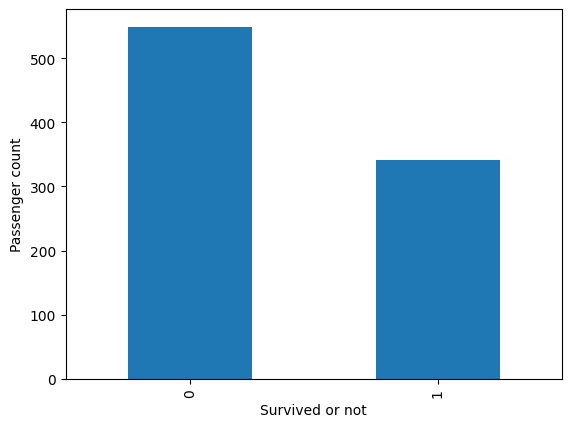

In [10]:
plt = train_df.Survived.value_counts().plot(kind='bar')
plt.set_xlabel("Survived or not")
plt.set_ylabel("Passenger count")

Text(0, 0.5, 'Passenger count')

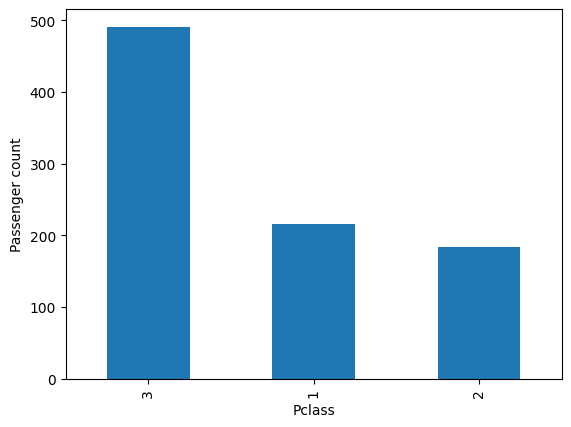

In [11]:
plt = train_df.Pclass.value_counts().plot(kind='bar')
plt.set_xlabel("Pclass")
plt.set_ylabel("Passenger count")

<Axes: xlabel='Pclass', ylabel='count'>

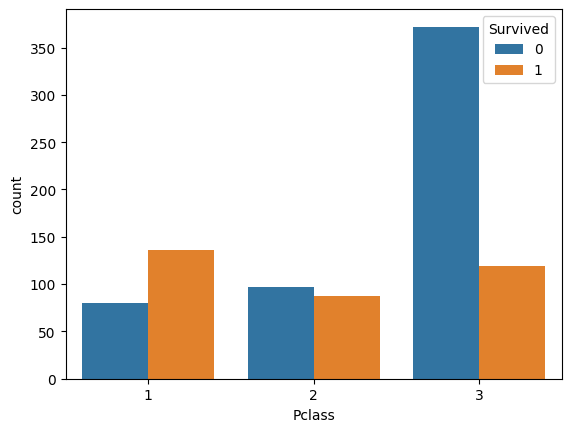

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

<Axes: xlabel='Sex', ylabel='count'>

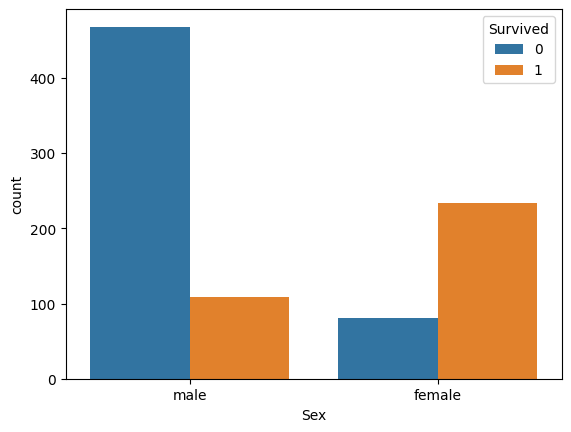

In [13]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

<ipython-input-14-f6fbccf5a20e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

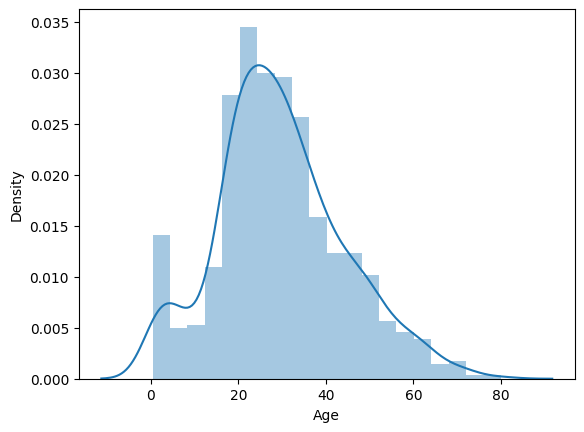

In [14]:
sns.distplot(train_df['Age'])

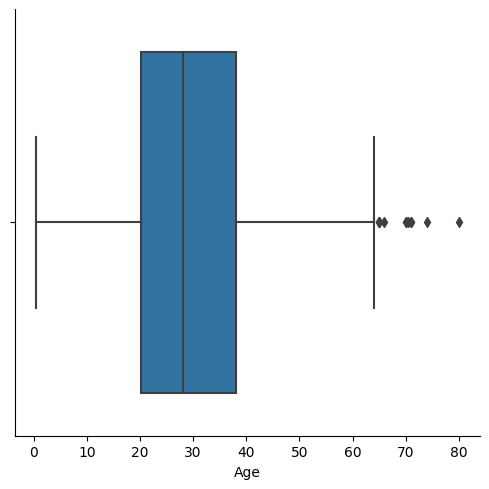

In [15]:
sns.catplot(x='Age', data=train_df, kind='box')

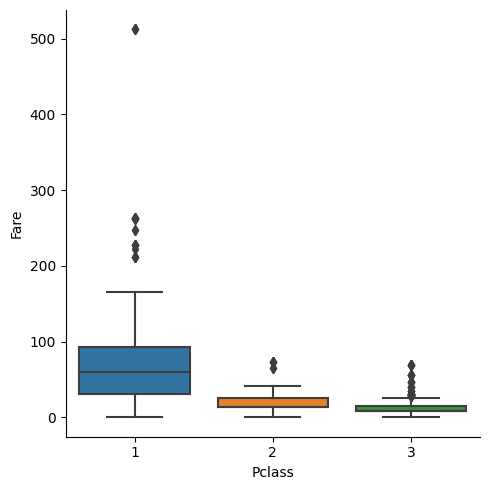

In [16]:
sns.catplot(x='Pclass', y='Fare', data=train_df, kind='box')

<ipython-input-17-5cffd907106f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True)


<Axes: >

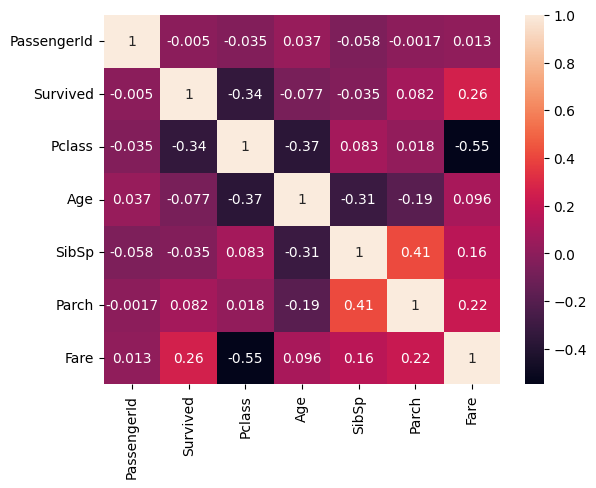

In [17]:
sns.heatmap(train_df.corr(), annot=True)

# high-density visualizations and summary

Sweetviz is a Python library that provides an easy and automated way to perform exploratory data analysis (EDA) on datasets. It generates high-density visualizations and summary reports that help you quickly understand the structure and relationships within your data.

In [73]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 38.3 MB/s eta 0:00:00


In [74]:
import sweetviz as sv
report =sv.analyze(df)
report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Pre Processing

In [18]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
drop_cols = ['Name', 'PassengerId','Ticket','Cabin']
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [23]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [24]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [25]:
age_mean = int(train_df['Age'].mean())
embarked_mode = train_df['Embarked'].mode()[0]
train_df['Age'].fillna(int(train_df['Age'].mean()), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Age'].fillna(int(test_df['Age'].mean()), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [26]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
q1 = train_df['Age'].quantile(0.25)
q3 = train_df['Age'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

train_df = train_df[((train_df.Age >= ll) & (train_df.Age <= ul))]

max_age_train = train_df['Age'].max()
min_age_train = train_df['Age'].min()

def cap_age(age):
  if age >= max_age_train:
    return max_age_train
  if age<= min_age_train:
    return min_age_train
  return age

test_df['Age'] = test_df['Age'].apply(lambda x: cap_age(x))

In [28]:
df_c1_train = train_df[train_df.Pclass == 1]
df_c2_train = train_df[train_df.Pclass == 2]
df_c3_train = train_df[train_df.Pclass == 3]

df_c1_test = test_df[test_df.Pclass == 1]
df_c2_test = test_df[test_df.Pclass == 2]
df_c3_test = test_df[test_df.Pclass == 3]

def cap_fare(fare, max_fare, min_fare):
  if fare >= max_fare:
    return max_fare
  if fare <= min_fare:
    return min_fare
  return fare

def celan_fare(df_train,df_test):
  q1 = df_train['Fare'].quantile(0.25)
  q3 = df_train['Fare'].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  ll = q1 - 1.5*iqr
  df_train = df_train[((df_train.Fare >= ll) & (df_train.Fare <= ul))]
  max_fare, min_fare = df_train['Fare'].max(), df_train['Fare'].min()
  df_test['Fare'] = df_test['Fare'].apply(lambda x: cap_fare(x, max_fare, min_fare))

  return df_train, df_test

df1, df2 = celan_fare(df_c1_train, df_c1_test)
df3, df4 = celan_fare(df_c2_train, df_c2_test)
df5, df6 = celan_fare(df_c3_train, df_c3_test)

train_df = pd.concat([df1,df3,df5])
test_df = pd.concat([df2,df4,df6])

<ipython-input-28-11106047d2dc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Fare'] = df_test['Fare'].apply(lambda x: cap_fare(x, max_fare, min_fare))
<ipython-input-28-11106047d2dc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Fare'] = df_test['Fare'].apply(lambda x: cap_fare(x, max_fare, min_fare))
<ipython-input-28-11106047d2dc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [34]:
train_df['Sex'] = train_df['Sex'].apply(lambda x: 1 if x== "male" else 0)
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 3})

test_df['Sex'] = test_df['Sex'].apply(lambda x: 1 if x== "male" else 0)
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 3})

In [35]:
temp = train_df
temp['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q':3})

In [36]:
temp['Embarked']

1     NaN
3     NaN
6     NaN
23    NaN
30    NaN
       ..
881   NaN
882   NaN
884   NaN
888   NaN
890   NaN
Name: Embarked, Length: 753, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
features = train_df.drop("Survived", axis=1)#x
labels = train_df["Survived"] #y, class
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,
                                                    random_state=123)

# Machine Learning Model

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import xgboost
# import catboost
# import lightgbm

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def evaluate(model, X_test, y_test):
	pred = model.predict(X_test)
	accuracy = accuracy_score(y_test, pred)
	precision = precision_score(y_test, pred, average='macro')
	recall = recall_score(y_test, pred, average='macro')
	f1 = f1_score(y_test, pred, average='macro')
	print(classification_report(y_test, pred))
	print('Accuracy: %f' % accuracy)
	print('Precision: %f' % precision)
	print('Recall: %f' % recall)
	print('F1 score: %f' % f1)
	print("================================================================")

In [40]:
DT_clf = DecisionTreeClassifier()
RF_clf = RandomForestClassifier()
# XGB_clf = xgboost.XGBClassifier()
# CAT_clf = catboost.CatBoostClassifier(verbose=0)
# LGBM_clf = lightgbm.LGBMClassifier()

In [42]:
#Try all the models with hyper parameter tuning
models = {
    "RF": RF_clf,
    "DT": DT_clf
}
for name, model in models.items():
    print(name)
    model.fit(x_train.drop(['Embarked'], axis=1), y_train)
    #tuning
    evaluate(model, x_test.drop(['Embarked'], axis=1), y_test)

RF
              precision    recall  f1-score   support

           0       0.68      0.69      0.68        91
           1       0.52      0.50      0.51        60

    accuracy                           0.62       151
   macro avg       0.60      0.60      0.60       151
weighted avg       0.61      0.62      0.61       151

Accuracy: 0.615894
Precision: 0.597330
Recall: 0.596154
F1 score: 0.596629
DT
              precision    recall  f1-score   support

           0       0.65      0.66      0.66        91
           1       0.47      0.47      0.47        60

    accuracy                           0.58       151
   macro avg       0.56      0.56      0.56       151
weighted avg       0.58      0.58      0.58       151

Accuracy: 0.582781
Precision: 0.563375
Recall: 0.563004
F1 score: 0.563163


In [43]:
x_test.drop(['Embarked'], axis=1).columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [44]:
test_df.drop(['Embarked'], axis=1).columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [45]:
final_model = RandomForestClassifier()
final_model.fit(x_train.drop(['Embarked'], axis=1), y_train)

RandomForestClassifier()

# Prediction

In [46]:
pred = final_model.predict(test_df.drop(['PassengerId', 'Embarked'], axis=1))

In [47]:
test_df['Survived'] = pred

In [48]:
submission = test_df[['PassengerId', 'Survived']]

In [49]:
submission.to_csv("submission.csv", index=False)

# Save Model

In [53]:
import pickle

In [56]:
# Assuming final_model is defined
with open('classifier.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [57]:
pickle.dump(final_model, open(r"/content/titanic_.pk1", "wb"))

# Load Model

In [59]:
loaded_model = pickle.load(open(r"/content/titanic_.pk1", "rb"))

In [60]:
loaded_model.predict(test_df.drop(['PassengerId','Embarked','Survived'], axis=1))

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [61]:
# Assuming you have the CSV file "titanic_dataset.csv" in the current working directory
df = pd.read_csv('train.csv')

In [62]:
# File path where the pickle file will be saved
file_path = 'titanic_dataset.pickle'

# Step 3: Open a file in binary write mode
with open(file_path, 'wb') as file:
    # Step 4: Serialize the DataFrame and write it to the file
    pickle.dump(df, file)

# Step 5: The file is automatically closed after exiting the 'with' block

print(f'Pickle file "{file_path}" has been created.')

Pickle file "titanic_dataset.pickle" has been created.


In [63]:
print(df.info())   # General information about the DataFrame
print(df.head())   # Display the first few rows of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [64]:
survivors_count = df['Survived'].value_counts()
print(survivors_count)


0    549
1    342
Name: Survived, dtype: int64


In [65]:
total_passengers = df.shape[0]
survival_percentage = (survivors_count[1] / total_passengers) * 100
print(f"Survival Percentage: {survival_percentage:.2f}%")

Survival Percentage: 38.38%


In [66]:
survival_by_sex_pclass = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print(survival_by_sex_pclass)

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


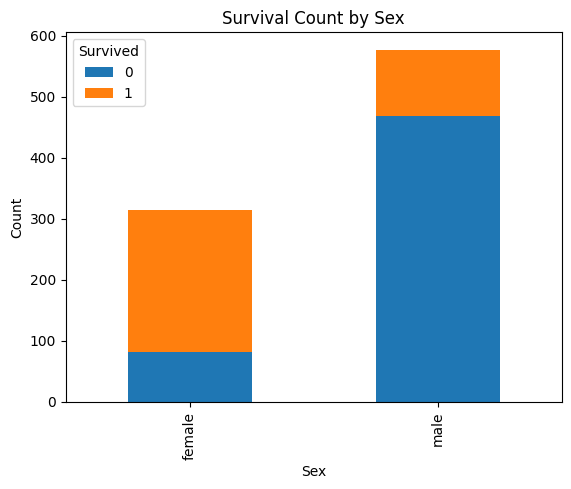

In [67]:
import matplotlib.pyplot as plt

survival_by_sex = df['Survived'].groupby(df['Sex']).value_counts().unstack()
survival_by_sex.plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [68]:
import pandas as pd

# Assuming you have the CSV file "titanic_dataset.csv" in the current working directory
df = pd.read_csv('train.csv')

# Count the number of people who survived (1) and who didn't (0)
survivors_count = df['Survived'].value_counts()

# Get the number of survivors and non-survivors
num_survived = survivors_count[1]
num_died = survivors_count[0]

# Calculate the total number of people on the Titanic
total_passengers = df.shape[0]

print(f"Total passengers on the Titanic: {total_passengers}")
print(f"Number of people who survived: {num_survived}")
print(f"Number of people who died: {num_died}")

Total passengers on the Titanic: 891
Number of people who survived: 342
Number of people who died: 549
